## 说明

请按照填空顺序编号分别完成 `参数优化` ，`不同基函数` 的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中 `x` 的范围在0-25之间

In [102]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========

    ret = x.copy()
    for i in range(feature_num - 1):
        poly = np.power(x, i+2)
        ret = np.hstack((ret, poly))

    return ret

def gaussian_basis(x, feature_num=10, width_scale=1.0):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========

    x = np.expand_dims(x, axis=1)
    x_c = np.tile(x, (1, feature_num))
    #mus = np.linspace(0, 25, feature_num).reshape(-1)
    mus = np.linspace(x.min(axis=0), x.max(axis=0), feature_num).reshape(-1)
    #sigma = (x.max(axis=0) - x.min(axis=0)) / 6
    sigma = width_scale * (mus[1] - mus[0])
    ret = np.exp(-0.5 * np.square((x_c - mus) / sigma))

    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [84]:
def main(x_train, y_train, mode='GD'):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)

    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========

    def optimize_LSM(x, y):
        assert len(x.shape) == 2
        assert x.shape[0] == y.shape[0]
        w = np.linalg.inv(np.matmul(x.T, x)).dot(x.T).dot(y)
        return w


    def optimize_GD(x, y, lr=1e-4, batch_size=32, epochs=6):
        assert len(x.shape) == 2
        assert x.shape[0] == y.shape[0]
        w = np.random.normal(0.0, 1.0, x.shape[1])
        idx = np.arange(x.shape[0])
        for e in range(epochs):
            np.random.shuffle(idx)
            batches = np.array_split(idx, x.shape[0]//batch_size)
            for batch in batches:
                dw = -np.dot(x[batch].T, (y[batch] - x[batch].dot(w)))
                w = w - lr * dw
        return w


    if mode == 'LSM':
        w = optimize_LSM(phi, y_train)
    else:
        w = optimize_GD(phi, y_train)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：2.1
预测值与真实值的标准差：2.2


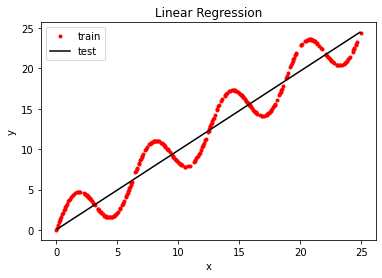

In [88]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)
    #f = main(x_train, y_train, mode='LSM')

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()